# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

import pylab
from mpl_toolkits.mplot3d import Axes3D

In [2]:
geo = pd.read_excel('geo_comment.xlsx')
geo

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...
...,...,...,...,...,...,...
70377,70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...


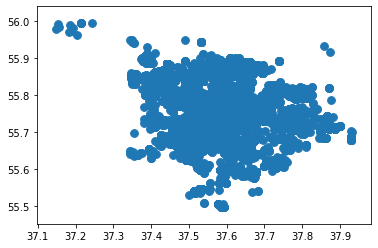

In [3]:
coordinates = geo[['x', 'y']]
plt.scatter(coordinates.to_numpy()[:, 0], coordinates.to_numpy()[:, 1], cmap='autumn', s=60)

# Normalize coordinates before determine districts

In [4]:
scaler = StandardScaler()

In [5]:
X = scaler.fit_transform(coordinates)

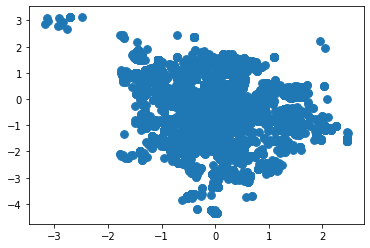

In [6]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

### Seems like Moscow. Normalized Moscow :)

In [7]:
model = DBSCAN()
clusters = model.fit_predict(X)
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

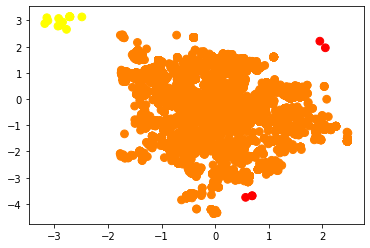

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='autumn', s=60)

**Bad results. Actually Moscow has 12 districts. By the way, i think this votes were received before Moscow extension.**

В задании написано про районы, но что-то мне посказывает, что имелось ввиду округа, коих 12 в Москве (районов гораздо больше).

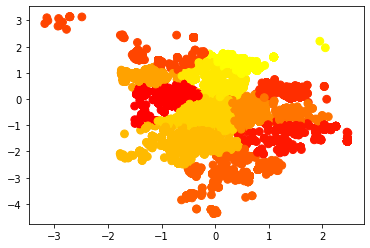

In [9]:
km = KMeans(n_clusters=12)
districts = km.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=districts, cmap='autumn', s=60)

The result is better, but still far from real picture
![](https://lh3.googleusercontent.com/proxy/b6NQbWRXvhXvJbymNyFC4dvZ2Oq_dbwYvUsZeLOM0kl1qMB2a6nBoViRhHihgO83c7Pj0qPh1X84xwLgfYQghpkNljqrezE)

**Code below causes MemoryError**

In [ ]:
def get_descr(algo_name, y_pred, X):
    return "{}\nSilhouette {:.2f}".format(
        algo_name,
        silhouette_score(X, y_pred)
    )

algorithms = [
    #AffinityPropagation(),
    KMeans(n_clusters=12),
    AgglomerativeClustering(n_clusters=12),
    DBSCAN(),
]

fig, axes = plt.subplots(1, len(algorigthms), figsize=(15, 2))
alpha = 0.3
for ax, algorithm in zip(axes, algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)
    ax.set_title(get_descr(algorithm.__class__.__name__, clusters, X))
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

ok, run AgglomerativeClustering separately

In [ ]:
ac = AgglomerativeClustering(n_clusters=12)
districts = ac.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=districts, cmap='autumn', s=60)

Well, maybe 8Gb is too low for data science computing...

# Votes clustering
## positive votes

In [11]:
def calc_pos(row):
    if row['comment_class'] == 1:
        return row['multiplier']
    else:
        return 0

positive = geo[['x', 'y', 'comment_class', 'multiplier']]
positive['positive'] = positive.apply(calc_pos, axis=1)
positive

D:\Python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x,y,comment_class,multiplier,positive
0,37.612416,55.777454,-1,1,0.0
1,37.612416,55.777454,-1,1,0.0
2,37.603298,55.742108,-1,1,0.0
3,37.558526,55.728758,-1,1,0.0
4,37.566431,55.731794,-1,1,0.0
...,...,...,...,...,...
70377,37.454528,55.792331,-1,1,0.0
70378,37.384325,55.899068,-1,1,0.0
70379,37.421066,55.848756,1,1,1.0
70380,37.448509,55.793065,-1,1,0.0


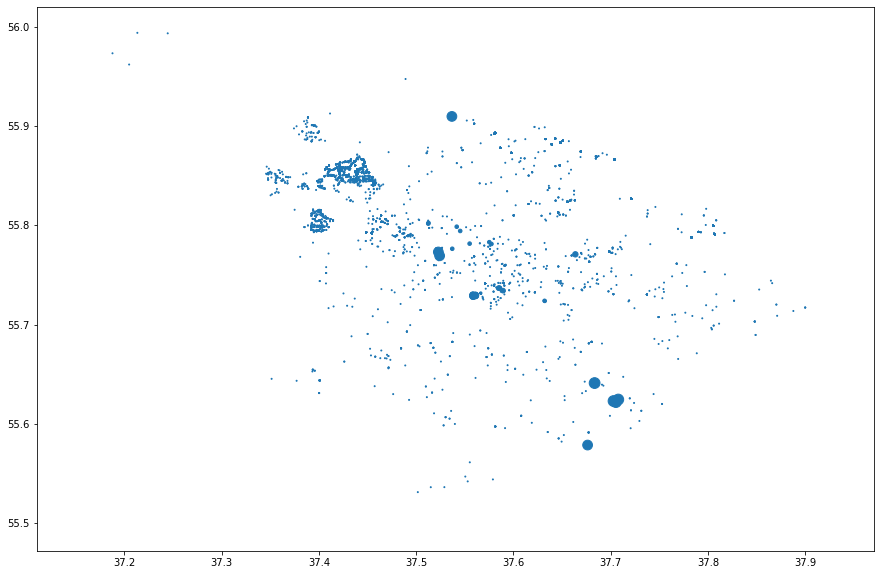

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.scatter(positive['x'], positive['y'], positive['positive'])

plt.show()

In [ ]:
%%time
X = positive[['x','y','positive']]
# X = X[X['positive'] > 0]
model = DBSCAN()
clusters = model.fit_predict(X)

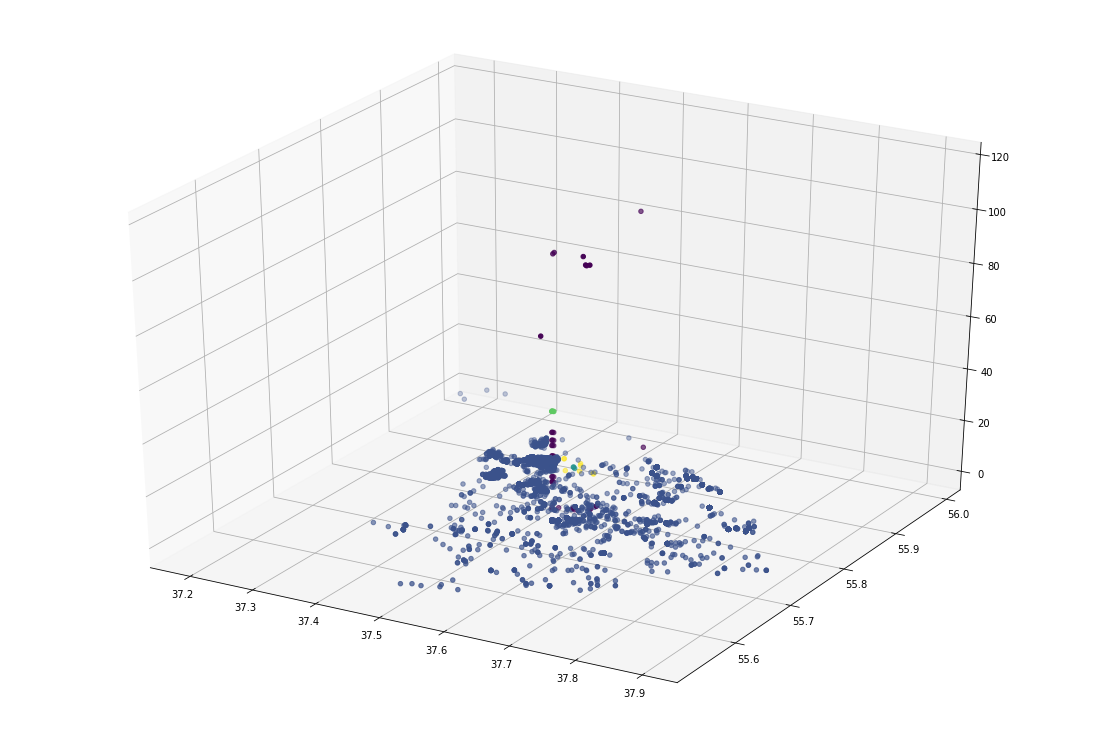

In [21]:
# clustering demonstration
fig = pylab.figure()
ax = Axes3D(fig)
ax.scatter(X['x'], X['y'], X['positive'], c=clusters)

pylab.show()

**So, we have to run a code with clusters count optimization**

In [ ]:
def get_descr(algo_name, X, y ):
    return "{}\nSilhouette {:.2f}".format(
        algo_name,
        silhouette_score(X, y)
    )

claster_count = [2,4,6,8,12]

fig, axes = plt.subplots(1, len(claster_count), figsize=(15, 2))
alpha = 0.3
for ax, cc in zip(axes, claster_count):
    # кластеризуем и выводим картинку
    km = KMeans(n_clusters=cc)
    clusters = km.fit_predict(X)
    ax.scatter(X['x'], X['y'], c=clusters, cmap='autumn', s=60, alpha=alpha)
    ax.set_title(get_descr(cc, X, clusters))
    
    # show centers of the algorithm
    # centers = km.cluster_centers_
    # ax.scatter(centers[:, 0], centers[:, 1], s=50)

**Best class count is 2**

## negative votes

In [ ]:
def calc_pos(row):
    if row['comment_class'] == 1:
        return row['multiplier']
    else:
        return 0

X = geo[['x', 'y', 'comment_class', 'multiplier']]
X['negative'] = X.apply(calc_pos, axis=1)
X

# Additional task
Determine most relevant topics.
Plan:
* tokenize comments
* lemmatize
* count the most common words
* delete stop words
* topic modeling

Task is too big and quite independet from previous ones. See this task completion in topic_modeling.ipynb

In [ ]:
geo['comment']